In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile

In [3]:
pred = pd.read_csv('predict.csv')
print((pred.keys()))
l = ['landing_x', 'landing_y', 'short service', 'net shot', 'lob', 'clear', 'drop', 'push/rush', 'smash', 'defensive shot', 'drive', 'long service']
l2 = ['landing_x', 'landing_y', 'short service', 'netshot', 'lob', 'clear', 'drop', 'pushrush', 'smash', 'defensive shot', 'drive', 'longservice']
for j in range(len(l)):
    for i in l:
        pred[i] = 0
    pred[l[j]] = 1
    pred.to_csv('prediction.csv', index=False)
    with zipfile.ZipFile(f'prediction{l2[j]}.zip', 'w') as zipf:
        zipf.write(f'prediction.csv')
{'defensive shot': 978.0472089491, 'clear': 1000.9043518063, 'drive': 992.3329232348, 'lob': 992.3329232348, 'smash': 958.0472089491, 'pushrush': 975.190066092}

Index(['rally_id', 'sample_id', 'ball_round', 'landing_x', 'landing_y',
       'short service', 'net shot', 'lob', 'clear', 'drop', 'push/rush',
       'smash', 'defensive shot', 'drive', 'long service'],
      dtype='object')


{'defensive shot': 978.0472089491,
 'clear': 1000.9043518063,
 'drive': 992.3329232348,
 'lob': 992.3329232348,
 'smash': 958.0472089491,
 'pushrush': 975.190066092}

In [4]:
# matches = pd.read_csv('match_metadata.csv')
train = pd.read_csv('train.csv')
# train = pd.read_csv('prediction.csv')
test = pd.read_csv('test_given.csv')
# output = pd.read_csv('val_given.csv')

In [5]:
    # selected_columns = ['rally', 'ball_round', 'time', 'frame_num', 'roundscore_A', 'roundscore_B', 
    #                     'player', 'type', 'aroundhead', 'backhand', 'landing_height', 'landing_area', 
    #                     'landing_x', 'landing_y', 'lose_reason', 'getpoint_player', 'player_location_area', 
    #                     'player_location_x', 'player_location_y', 'opponent_location_area', 'opponent_location_x', 'opponent_location_y', 
    #                     'set', 'match_id', 'rally_id', 'rally_length']

In [17]:
def frequency_plot(attribute, data, sortByIndex = True):
    type_counts = data[attribute].value_counts()
    if sortByIndex:
        type_counts = type_counts.sort_index()
    else:
        type_counts = type_counts.sort_values()
    for k, i in type_counts.items():
        print(f'{k}\t\t{i / type_counts.sum()* 100:.3f} %')
        # print(f'{i}')
    print(type_counts.sum())
    plt.figure(figsize=(10, 6))
    type_counts.plot(kind='bar')
    plt.grid(axis='y')
    plt.xlabel(attribute)
    plt.ylabel('count')
    plt.title(f'Frequency of {attribute}')
    plt.xticks(rotation=45)
    plt.show()

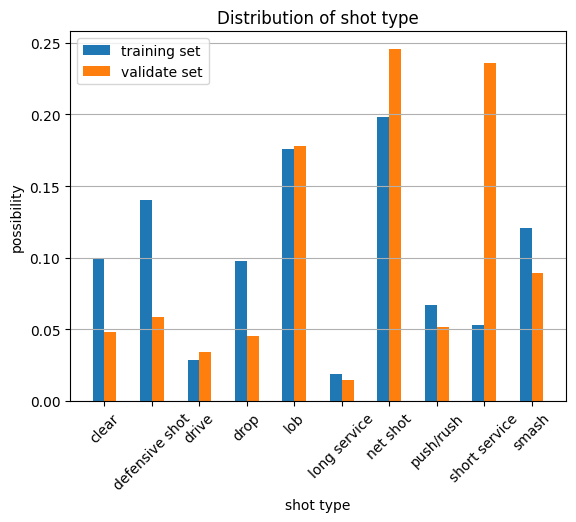

In [11]:

# train_type_counts = train['type'].value_counts().sort_index()
train_type_counts = train[train['player'].isin([3, 5, 11, 12, 15, 16, 20])]['type'].value_counts().sort_index()
test_type_counts = test['type'].value_counts().sort_index()
s = test_type_counts.sum()
for k, i in test_type_counts.items():
    test_type_counts[k] /= s
s = train_type_counts.sum()
for k, i in train_type_counts.items():
    train_type_counts[k] /= s

n=10
r = np.arange(n)
width = 0.25
plt.grid(axis='y')
  
plt.bar(r, train_type_counts, width = width, label='training set')
plt.bar(r + width, test_type_counts, width = width, label='validate set')
  
plt.xlabel("shot type")
plt.ylabel("possibility")
plt.title("Distribution of shot type")
# plt.grid(linestyle='--')
plt.xticks(r + width/2,list(train_type_counts.keys()))
plt.xticks(rotation=45)
plt.legend()
plt.show()

clear		10.202 %
defensive shot		13.546 %
drive		3.089 %
drop		10.546 %
lob		17.258 %
long service		2.148 %
net shot		18.975 %
push/rush		6.665 %
short service		5.369 %
smash		12.203 %
30172


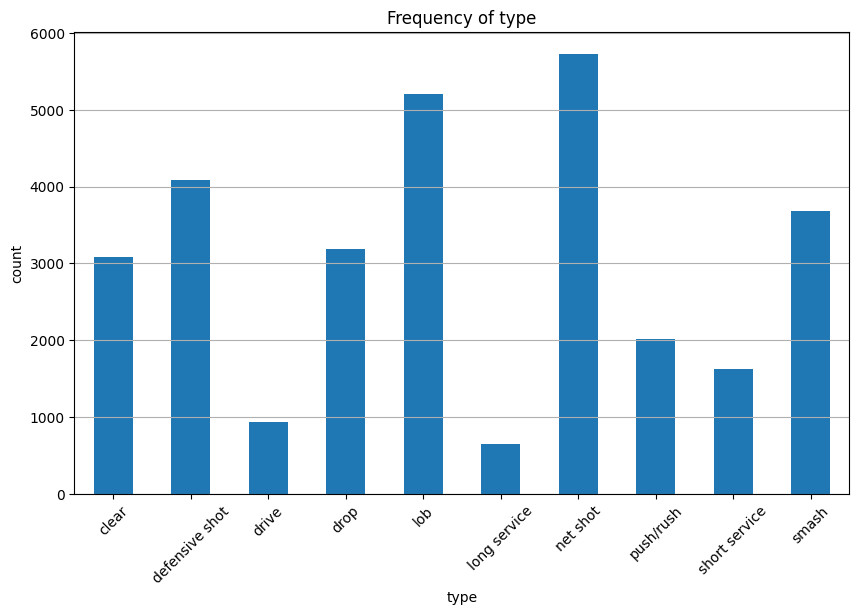

clear		4.786 %
defensive shot		5.857 %
drive		3.429 %
drop		4.500 %
lob		17.786 %
long service		1.429 %
net shot		24.571 %
push/rush		5.143 %
short service		23.571 %
smash		8.929 %
1400


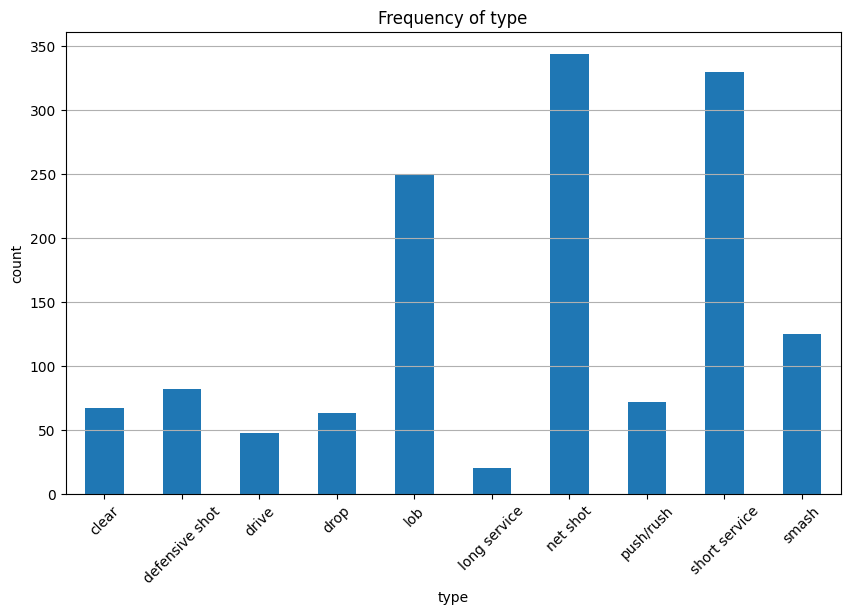

clear		9.918 %
defensive shot		14.001 %
drive		2.858 %
drop		9.786 %
lob		17.591 %
long service		1.909 %
net shot		19.849 %
push/rush		6.712 %
short service		5.295 %
smash		12.080 %
8328


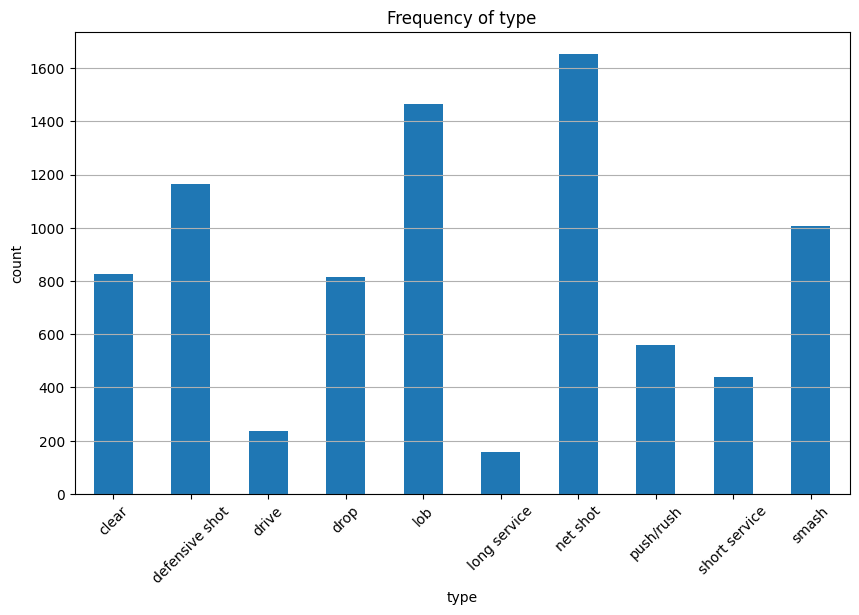

In [19]:
# Assuming 'Type' is the column containing the different types in your DataFrame
# print(train[train['player'].isin([3, 5, 11, 12, 15, 16, 20])])
for i in ['type']:
    frequency_plot(i, sortByIndex=True, data=train)
    frequency_plot(i, sortByIndex=True, data=test)
    frequency_plot(i, sortByIndex=True, data=train[train['player'].isin([3, 5, 11, 12, 15, 16, 20])])
    # frequency_plot(i, True)


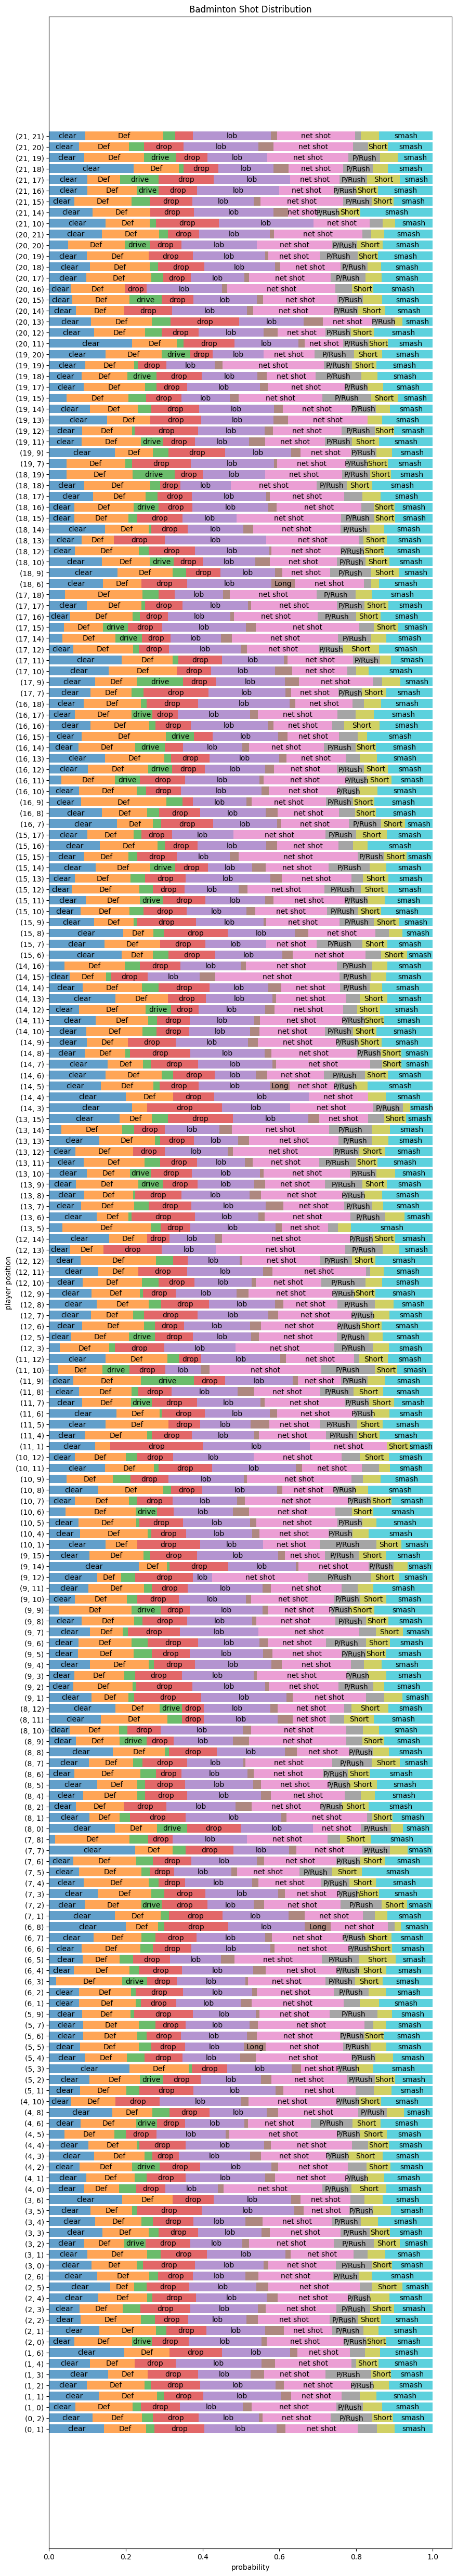

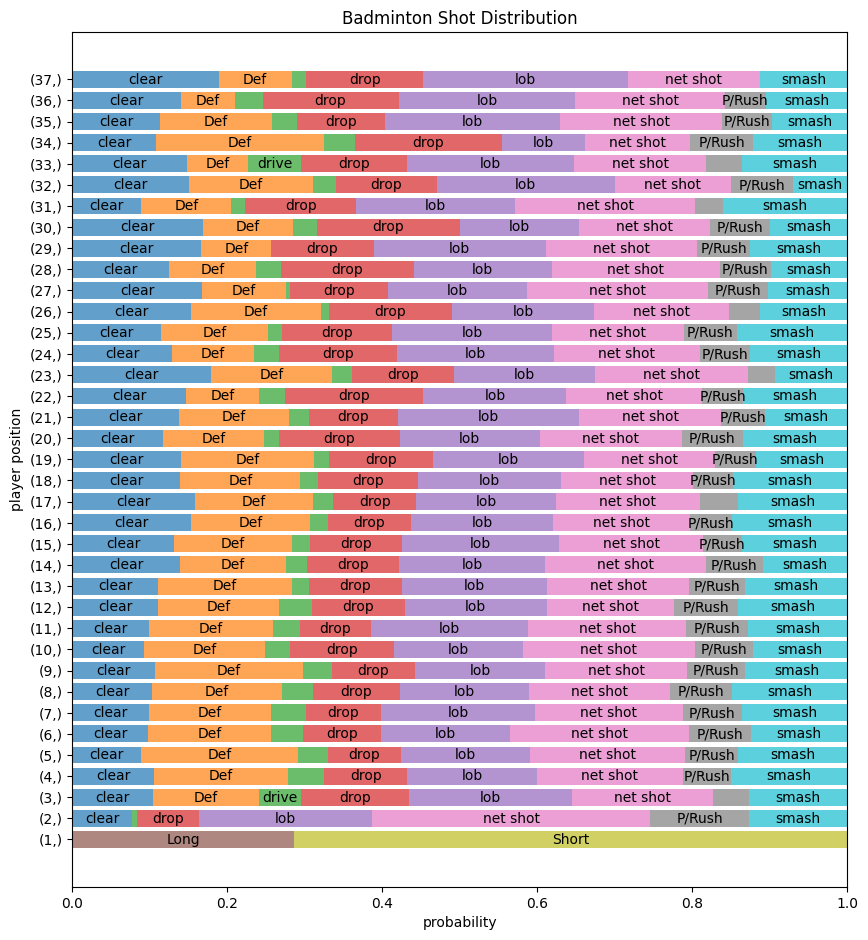

In [10]:
def typeAttr(attr, data, title = 'Badminton Shot Distribution'):
    actions = ['clear', 'defensive shot', 'drive', 'drop', 'lob', 'long service', 'net shot', 'push/rush', 'short service', 'smash']
    short_actions = ['clear', 'Def', 'drive', 'drop', 'lob', 'Long', 'net shot', 'P/Rush', 'Short', 'smash']
    table = {}
    for i in range(len(data)):
        
        pair = tuple(data[j][i] for j in attr)
        if pair not in table:
            table[pair] = {}
        if data['type'][i] not in table[pair]:
            table[pair][data['type'][i]] = 0
        table[pair][data['type'][i]] += 1
    l = []
    for k, i in table.items():
        s = 0
        for j in table[k]:
            s += table[k][j]
        if s < 50:
            l.append(k)
    for i in l:
        del table[i]
    for k, i in table.items():
        s = 0
        for j in table[k]:
            s += table[k][j]
        for j in actions:
            if j not in table[k]:
                table[k][j] = 0
            else:
                table[k][j] /= s
        # print(table[k].items())
        # table[k] = sorted(table[k].items())
        # print(type(table[k]))
    data = sorted(table.items())
    # print(type(table))
    # print(data)
    scores = []
    labels = []
    for item in data:
        x = sorted(item[1].items())
        # print(x)
        # print(item[1])
        score = []
        for j in range(0, len(x)):
            score.append(x[j][1])
        scores.append(score)
    # print(actions)
    # print(scores)
    fig, ax = plt.subplots(figsize=(10, len(data) * 0.3))
    y_pos = range(len(data))

    for i, score in enumerate(scores):
        left = 0
        for j, s in enumerate(score):
            ax.barh(y_pos[i], s, left=left, align='center', alpha=0.7)
            left += s
            if s < 0.05:
                continue
            ax.text(left - s / 2, y_pos[i], short_actions[j], ha='center', va='center')
    ax.set_yticks(y_pos)
    ax.set_yticklabels([item[0][0] if len(item) == 1 else item[0] for item in data])
    ax.set_xlabel('probability')
    ax.set_ylabel('player position')
    ax.set_title(title)
    # ax.grid(axis='x')
    plt.show()
        # pair = (data['player_location_area'][i], train['opponent_location_area'][i])
# typeAttr(['aroundhead'])
typeAttr(['roundscore_A', 'roundscore_B'], train)
# typeAttr(['player_location_area'], train)
# typeAttr(['opponent_location_area'], train)
# typeAttr(['opponent_location_area'], train)
# typeAttr(['opponent_location_area', 'player_location_area'], train)
# typeAttr(['player'], test)
# typeAttr(['player'], train)
# typeAttr(['player'], pd.concat([train, test], ignore_index = True))
# typeAttr(['player'], pd.concat([train, test]).astype({'player': np.int64}))
# typeAttr(['ball_round'], train)
